<a href="https://colab.research.google.com/github/mangesh-ux/object-detection-using-yolo/blob/main/YOLO_Object_Detection_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Object Detection

## Author: Mangesh Gupta

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget --header="Host: pjreddie.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Referer: https://pjreddie.com/darknet/yolo/" --header="Cookie: __utmc=134107727; __utmz=134107727.1622751907.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utma=134107727.880186402.1622751907.1622751907.1622754424.2; __utmt=1; __utmb=134107727.1.10.1622754424" --header="Connection: keep-alive" "https://pjreddie.com/media/files/yolov3-tiny.weights" -c -O 'yolov3-tiny.weights'

--2021-06-03 21:09:20--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  15.7MB/s    in 2.2s    

2021-06-03 21:09:22 (15.7 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [27]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights", "./yolov3-tiny.cfg")

In [28]:
classes = []
with open("./coco.names", 'r') as f:
    classes = f.read().splitlines()

In [29]:
len(classes)

80

In [55]:
img = cv2.imread("./hitesh-choudhary-obyN62uvANI-unsplash.jpg")
height, width, _ = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB = True, crop = False)


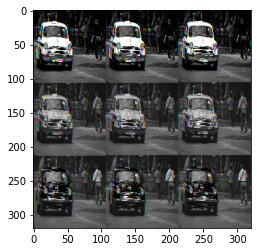

In [56]:
#to print img
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [57]:
yolo.setInput(blob)

In [58]:
output_layers_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_names)

In [59]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)

            #find corner
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))

            class_ids.append(class_id)


In [60]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [61]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [62]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img, label + " " + confi, (x,y+20), font, 2, (255, 255, 255), 2)

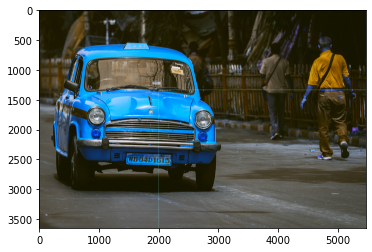

In [63]:
plt.imshow(img)

In [64]:
cv2.imwrite("./img1.jpg", img)

True